### First let's import some libraries and get some public data

#### Imports

In [1]:
import numpy as np
import pandas_datareader.data as web
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Fetch S&P500 ETF market data

In [2]:
sp = web.DataReader('SPY', 'yahoo', start='1990-01-01')

In [3]:
sp.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1993-01-29,43.9687,43.9687,43.7500,43.9375,1003200,28.455368
1993-02-01,43.9687,44.2500,43.9687,44.2500,480500,28.657753
1993-02-02,44.2187,44.3750,44.1250,44.3437,201300,28.718437
1993-02-03,44.4062,44.8437,44.3750,44.8125,529400,29.022047
1993-02-04,44.9687,45.0937,44.4687,45.0000,531500,29.143478


#### Now let's add some computed information

In [4]:
#adding '_' to facilitate handling the column
sp.rename(columns={'Adj Close':'Adj_Close'}, inplace=True) 
sp['p_r'] = sp.Adj_Close/sp.Adj_Close.shift()-1        #simple returns
sp['l_r'] = np.log(sp.Adj_Close/sp.Adj_Close.shift())  #log returns
sp.tail()

,Open,High,Low,Close,Volume,Adj_Close,p_r,l_r
Date,,,,,,,,
2016-05-13,206.210007,206.860001,204.380005,204.759995,94791100,204.759995,-0.008714,-0.008752
2016-05-16,204.960007,207.339996,204.889999,206.779999,75737300,206.779999,0.009865,0.009817
2016-05-17,206.460007,206.800003,204.229996,204.850006,109782900,204.850006,-0.009334,-0.009377
2016-05-18,204.440002,206.300003,203.630005,204.910004,120062100,204.910004,0.000293,0.000293
2016-05-19,204.059998,204.539993,202.779999,204.199997,114063200,204.199997,-0.003465,-0.003471


#### Now let's plot the histogram of the SPY *log returns*. It tends to a normal distribution.

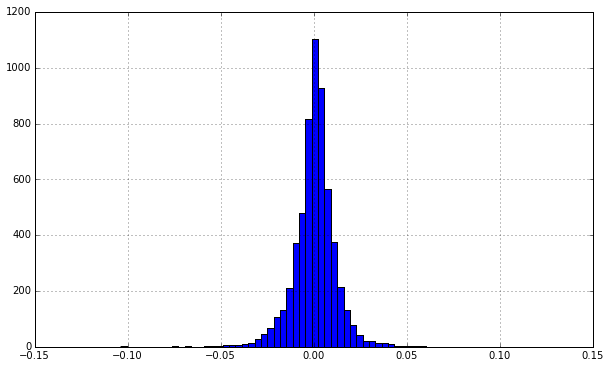

In [5]:
sp.l_r.hist(bins=70, figsize=(10,6))

#### Now let's get to Benford

In [6]:
import benford as bf

##### The classes First, Second and LastTwo represent the Benfords's Expected proportions for the first, second and last two digits. Note that First may be applied to the first one, first two and first three digits by changing the 'digs' parameter. Plotting the expected proportions is True by default, but may be supressed if one only wants to use the resulting DataFrame.

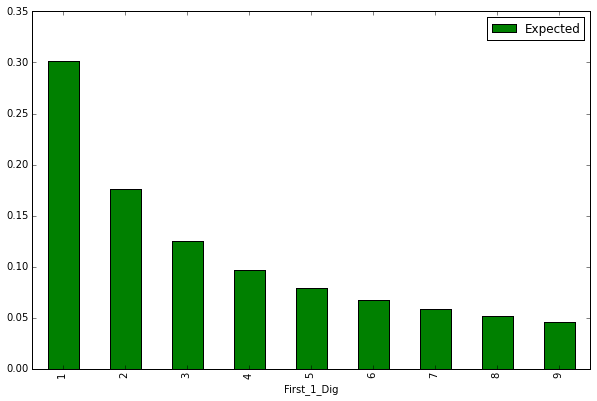

In [7]:
f1d = bf.First(1)

In [8]:
f1d

,Expected
First_1_Dig,
1,0.301030
2,0.176091
3,0.124939
4,0.096910
5,0.079181
6,0.066947
7,0.057992
8,0.051153
9,0.045757


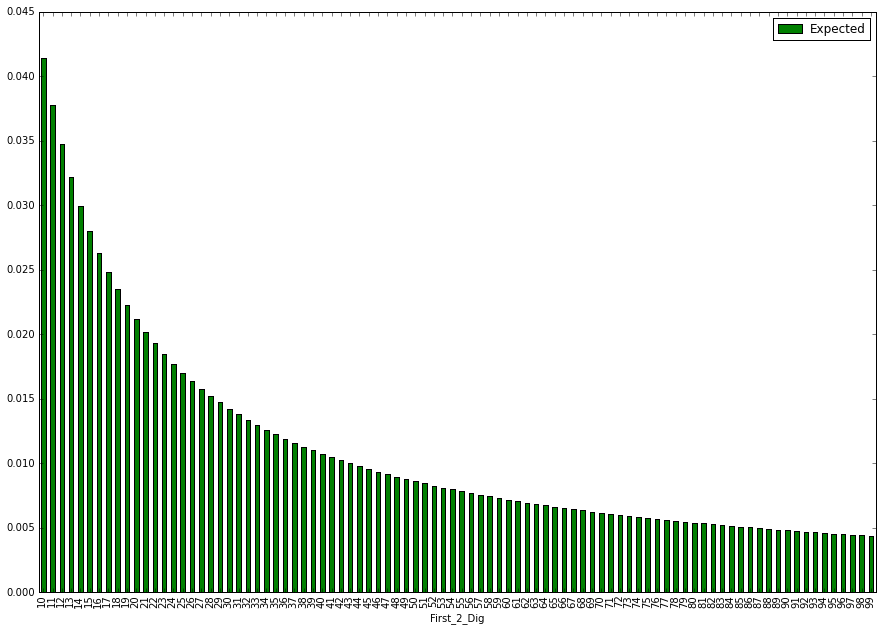

In [18]:
f2d = bf.First(2)

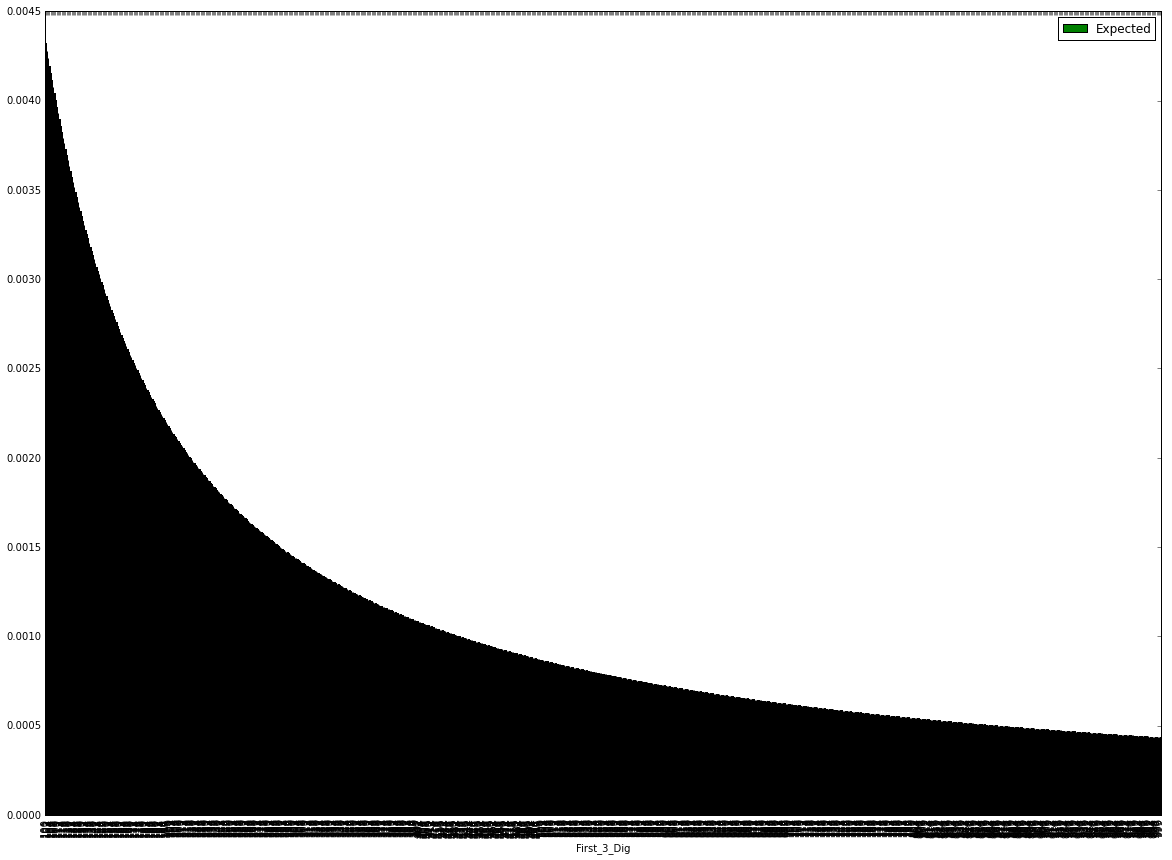

In [20]:
f3d = bf.First(3) #will take some time to draw

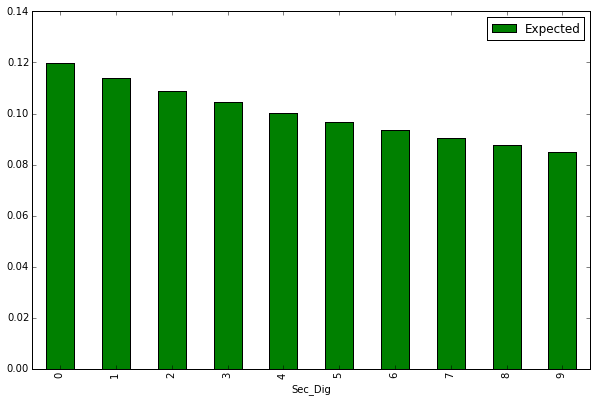

In [22]:
sd = bf.Second() #note decrease in steapness

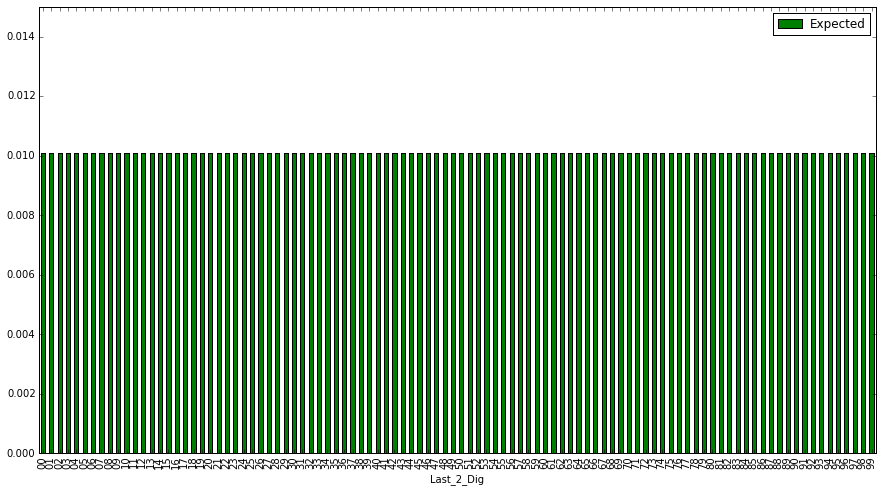

In [23]:
l2d = bf.LastTwo()

### Now to real usage
##### Benford's Analysis is the study of a series of numbers through the recording of digits position and comparing the digits proportion in the series with Benford's expected didstributions.

##### The main class in the Benford module is 'Analysis'. It takes a sequence of numbers and creates a pandas DataFrame with columns that refer to the digits and their position in each number.

In [39]:
a = bf.Analysis(abs(sp.l_r), dec=8)  # used absolute values of SPY log returns
a.head(10)

Initialized sequence with 5869 registries.


,Seq,ZN,F1D,SD,F2D,F3D,L2D
Date,,,,,,,
1993-02-01,0.007087,708719,7,0,70,708,19
1993-02-02,0.002115,211530,2,1,21,211,30
1993-02-03,0.010516,1051646,1,0,10,105,46
1993-02-04,0.004175,417536,4,1,41,417,36
1993-02-05,0.000696,69580,6,9,69,695,80
1993-02-08,0.000000,0,0,0,0,0,0
1993-02-09,0.006974,697352,6,9,69,697,52
1993-02-10,0.001399,139860,1,3,13,139,60
1993-02-11,0.004881,488087,4,8,48,488,87


In [44]:
z =np.log10(sp.l_r[sp.l_r!=0]).min()
z

-4.3182909708508719

In [45]:
int(4-z)

8

In [49]:
sp[sp.columns[(sp !=0.0).any()]]

,Open,High,Low,Close,Volume,Adj_Close,p_r,l_r
Date,,,,,,,,
1993-01-29,43.968700,43.968700,43.750000,43.937500,1003200,28.455368,NaN,NaN
1993-02-01,43.968700,44.250000,43.968700,44.250000,480500,28.657753,0.007112,0.007087
1993-02-02,44.218700,44.375000,44.125000,44.343700,201300,28.718437,0.002118,0.002115
1993-02-03,44.406200,44.843700,44.375000,44.812500,529400,29.022047,0.010572,0.010516
1993-02-04,44.968700,45.093700,44.468700,45.000000,531500,29.143478,0.004184,0.004175
1993-02-05,44.968700,45.062500,44.718700,44.968700,492100,29.123207,-0.000696,-0.000696
1993-02-08,44.968700,45.125000,44.906200,44.968700,596100,29.123207,0.000000,0.000000
1993-02-09,44.812500,44.812500,44.562500,44.656200,122100,28.920822,-0.006949,-0.006974
1993-02-10,44.656200,44.750000,44.531200,44.718700,379600,28.961299,0.001400,0.001399
